In [35]:
import numpy as np
import matplotlib.pyplot as plt
from lcapy import Circuit

# Circuit 1: Ohm's Law (Ohmsches Gesetz)

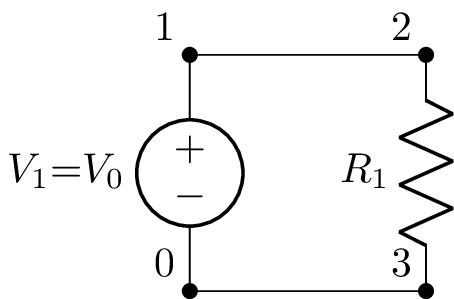

Symbolic Formula for Total Current:


V₀
──
R₁

In [36]:
cct = Circuit("""
V1 1 0 V0; down
W 1 2; right
R1 2 3 R1; down
W 3 0; left
""")

cct.draw(label_nodes=True)
i_total = cct.R1.i

print("Symbolic Formula for Total Current:")
display(i_total)

### Mathematical properties (mathematische Eigenschaften)
* Linear (linear)
* Source-free (quellenfrei)
* Time-invariant (zeitinvariant)
* Passive (passiv)
$$
y = mx
$$

<>:7: SyntaxWarning: invalid escape sequence '\O'
<>:7: SyntaxWarning: invalid escape sequence '\O'
/tmp/ipykernel_30065/85533697.py:7: SyntaxWarning: invalid escape sequence '\O'
  plt.plot(V_sweep, I_vals * 1000, label=f'Resistor = {R_val} $\Omega$', color='blue', linewidth=2)


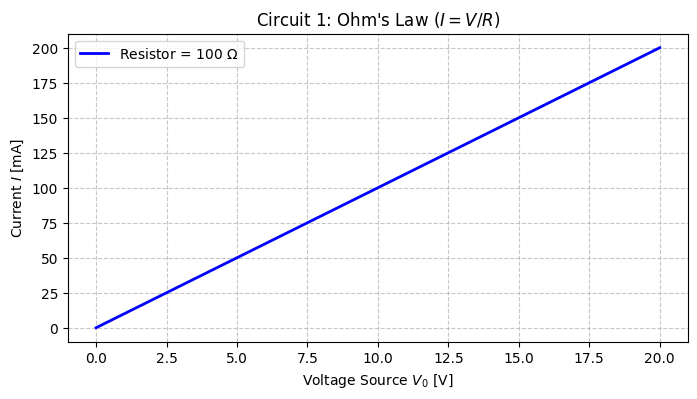

In [37]:
# Numerical plot example
R_val = 100
V_sweep = np.linspace(0, 20, 100)
I_vals = V_sweep / R_val

plt.figure(figsize=(8, 4))
plt.plot(V_sweep, I_vals * 1000, label=f'Resistor = {R_val} $\Omega$', color='blue', linewidth=2)
plt.title("Circuit 1: Ohm's Law ($I = V/R$)")
plt.xlabel("Voltage Source $V_0$ [V]")
plt.ylabel("Current $I$ [mA]")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Circuit 2: The Voltage Divider (Serienschaltung)

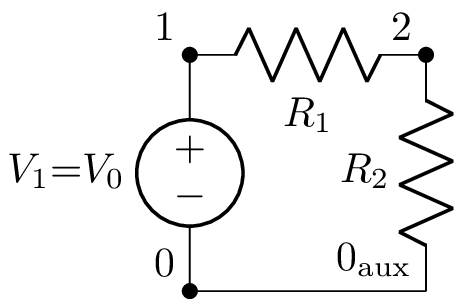

Symbolic Formula for Total Current:


 -V₀   
───────
R₁ + R₂

Voltage Divider Formula:


 R₂⋅V₀ 
───────
R₁ + R₂

In [29]:
cct2 = Circuit("""
V1 1 0 V0; down
R1 1 2 R1; right
R2 2 0_aux R2; down
W 0_aux 0; left
""")

cct2.draw(label_nodes=True)

i_total = cct2.V1.i
print("Symbolic Formula for Total Current:")
display(i_total)

v_out = cct2[2].v 

print("Voltage Divider Formula:")
display(v_out)

### Mathematical properties (mathematische Eigenschaften)
* Non-linear $V_2$ with respect to $R_2$ (nicht linear bezüglich $R_2$)
* $R_1$ is a constant

$$
V_2 = \frac{R_2}{R_1 + R_2} V_1
$$

* Curve starts at $(0, 0)$, from short circuit (Kurzschluss)
* It never reaches $V_1$ (approaches it asymptotically)

<>:9: SyntaxWarning: invalid escape sequence '\O'
<>:10: SyntaxWarning: invalid escape sequence '\O'
<>:9: SyntaxWarning: invalid escape sequence '\O'
<>:10: SyntaxWarning: invalid escape sequence '\O'
/tmp/ipykernel_30065/1575705139.py:9: SyntaxWarning: invalid escape sequence '\O'
  plt.title(f"Circuit 2: Voltage Divider Behavior ($V_{{in}}={V0_val}V, R_1={R1_val}\Omega$)")
/tmp/ipykernel_30065/1575705139.py:10: SyntaxWarning: invalid escape sequence '\O'
  plt.xlabel("Load Resistance $R_2$ [$\Omega$]")


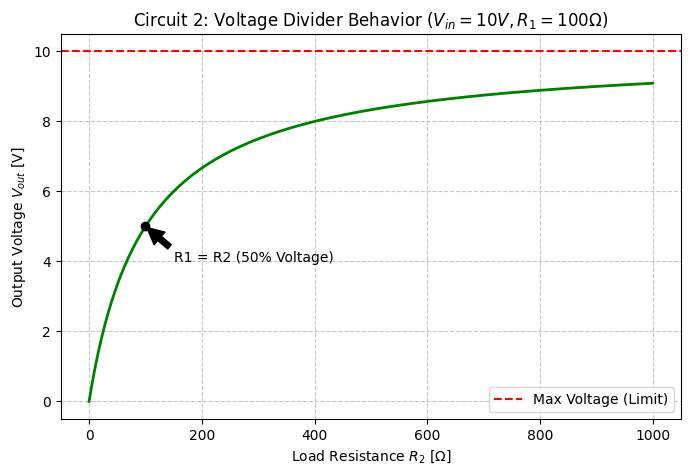

In [39]:
V0_val = 10  
R1_val = 100
R2_sweep = np.linspace(0, 1000, 500)

V_out_vals = V0_val * (R2_sweep / (R1_val + R2_sweep))

plt.figure(figsize=(8, 5))
plt.plot(R2_sweep, V_out_vals, color='green', linewidth=2)
plt.title(f"Circuit 2: Voltage Divider Behavior ($V_{{in}}={V0_val}V, R_1={R1_val}\Omega$)")
plt.xlabel("Load Resistance $R_2$ [$\Omega$]")
plt.ylabel("Output Voltage $V_{out}$ [V]")
plt.axhline(y=V0_val, color='red', linestyle='--', label='Max Voltage (Limit)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

half_volts = V0_val / 2
plt.scatter([R1_val], [half_volts], color='black', zorder=5)
plt.annotate('R1 = R2 (50% Voltage)', (R1_val, half_volts), xytext=(R1_val+50, half_volts-1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

# Circuit 3: The Current Divider (Parallelschaltung)

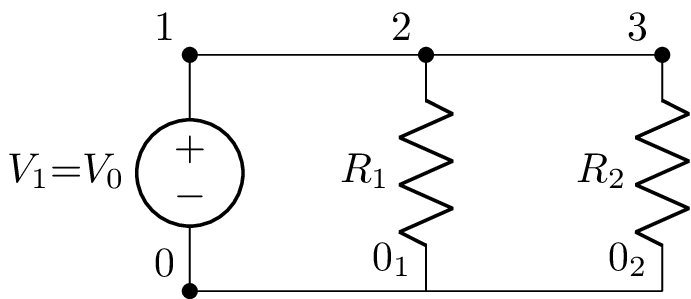

Currents from source, R1 and R2:


-R₁⋅V₀ - R₂⋅V₀
──────────────
    R₁⋅R₂     

V₀
──
R₁

V₀
──
R₂

Their sum is 0:


V₀   V₀   -R₁⋅V₀ - R₂⋅V₀
── + ── + ──────────────
R₂   R₁       R₁⋅R₂     

In [34]:
cct3 = Circuit("""
V1 1 0 V0; down
W 1 2; right
R1 2 0_1 R1; down
W 2 3; right
R2 3 0_2 R2; down
W 0_1 0; left
W 0_2 0_1; left
""")

cct3.draw(label_nodes=True)
i_source = cct3.V1.i
i_R1 = cct3.R1.i
i_R2 = cct3.R2.i
print("Currents from source, R1 and R2:")
display(i_source)
display(i_R1)
display(i_R2)

print("Their sum is 0:")
sum_of_currents = i_source + i_R1 + i_R2
display(sum_of_currents)


### Mathematical properties (mathematische Eigenschaften)
* Linear (linear)
* Branches are independent (Zweige sind unabhängig)
* Source-free (quellenfrei)
* Passive (passiv)

$$
I_t = V_0 \cdot (G_1 + G_2)
$$

<>:16: SyntaxWarning: invalid escape sequence '\O'
<>:16: SyntaxWarning: invalid escape sequence '\O'
/tmp/ipykernel_30065/4015738713.py:16: SyntaxWarning: invalid escape sequence '\O'
  plt.xlabel('Resistance of R1 [$\Omega$]')


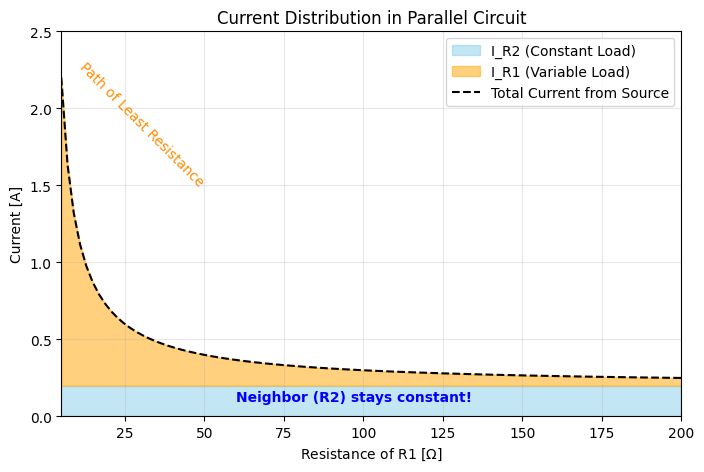

In [40]:
V0 = 10
R2_fixed = 50
R1_sweep = np.linspace(5, 200, 100)

I_R2 = np.full_like(R1_sweep, V0 / R2_fixed)
I_R1 = V0 / R1_sweep
I_Total = I_R2 + I_R1

plt.figure(figsize=(8, 5))

plt.fill_between(R1_sweep, 0, I_R2, color='skyblue', alpha=0.5, label='I_R2 (Constant Load)')
plt.fill_between(R1_sweep, I_R2, I_Total, color='orange', alpha=0.5, label='I_R1 (Variable Load)')
plt.plot(R1_sweep, I_Total, color='black', linestyle='--', label='Total Current from Source')

plt.title('Current Distribution in Parallel Circuit')
plt.xlabel('Resistance of R1 [$\Omega$]')
plt.ylabel('Current [A]')
plt.xlim(5, 200)
plt.ylim(0, 2.5)
plt.grid(True, alpha=0.3)
plt.legend()

plt.text(60, 0.1, "Neighbor (R2) stays constant!", color='blue', fontweight='bold')
plt.text(10, 1.5, "Path of Least Resistance", rotation=-45, color='darkorange')

plt.show()
